<a href="https://colab.research.google.com/github/astrfo/GridWorld/blob/main/GridWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import copy
import random
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
class GridWorld(object):
    def __init__(self):
        self.map = np.array(
            [[0, 0, 8, 0, 0, 0, 1, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0],
             [3, 0, 0, 0, 0, 0, 0, 0, 5],
             [0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0],
             [6, 0, 0, 0, 0, 0, 0, 0, 4],
             [0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 2, 0, 0, 0, 7, 0, 0]]
        )
        self.actions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])  # up, down, left, right
        self.width = self.map.shape[1]
        self.height = self.map.shape[0]
        self.start_position = np.array([4, 4])
        self.agent_position = copy.deepcopy(self.start_position)

    def reset(self):
        self.agent_position = copy.deepcopy(self.start_position)
        return self.agent_position

    def update_state(self, action):
        if action == 0 and self.agent_position[0] > 0:  # up
            self.agent_position += self.actions[action]
        elif action == 1 and self.agent_position[0] < (self.height - 1):  # down
            self.agent_position += self.actions[action]
        elif action == 2 and self.agent_position[1] > 0:  # left
            self.agent_position += self.actions[action]
        elif action == 3 and self.agent_position[1] < (self.width - 1):  # right
            self.agent_position += self.actions[action] 
        return self.agent_position

    def step(self, action, state):
        next_state = self.update_state(action)
        if self.map[next_state[0]][next_state[1]] > 0:
            return self.map[next_state[0]][next_state[1]], self.start_position
        else:
            return self.map[next_state[0]][next_state[1]], next_state

In [86]:
class Random(object):
    def __init__(self):
        pass

    def reset(self):
        pass
    
    def act(self, state):
        return random.randint(0, 3)
    
    def update(self, reward, next_state):
        pass

In [87]:
class QLearning(object):
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.alpha = 0.1
        self.gamma = 0.99
        self.eps = 0.01
        self.actions = np.array([0, 1, 2, 3])  # up, down, left, right
        self.Q = np.zeros((len(self.actions), self.height, self.width))

    def reset(self):
        self.Q = np.zeros((len(self.actions), self.height, self.width))

    def act(self, state):
        self.state = state
        ### e_greedy or softmax
        # self.action = self.e_greedy()
        self.action = self.softmax()
        return self.action

    def update(self, action, state, next_state, reward):
        max_Q = max(self.Q[:, next_state[0], next_state[1]])
        td_error = reward + self.gamma * max_Q  - self.Q[action, state[0], state[1]]
        self.Q[action, state[0], state[1]] += self.alpha * td_error

    def e_greedy(self):
        if random.random() < self.eps:
            action = random.randint(0, 3)
        else: 
            action = self.greedy()
        return action

    def greedy(self):
        CanChoiceQ = np.array(self.Q[:, self.state[0], self.state[1]])
        maxIndex = np.where(CanChoiceQ == max(CanChoiceQ))[0]
        return random.choice(maxIndex)

    def softmax(self):
        CanChoiceQ = np.array(self.Q[:, self.state[0], self.state[1]])
        x = np.exp(CanChoiceQ)
        u = np.sum(x)
        p_softmax = x/u
        return np.random.choice([0, 1, 2, 3], p=p_softmax)

In [88]:
class Simulator(object):
    def __init__(self, sim, epi, algo='r'):
        self.sim = sim
        self.epi = epi
        self.env = GridWorld()
        self.rewards = np.zeros((self.sim, self.epi))
        ### random or q-learning
        if algo == 'r': self.algo = Random(self.env.width, self.env.height)
        elif algo == 'q': self.algo = QLearning(self.env.width, self.env.height)

    def run(self):
        for sim in tqdm(range(self.sim)):
            self.algo.reset()
            for epi in range(self.epi):
                state = self.env.reset()
                while True:
                    action = self.algo.act(state)
                    reward, next_state = self.env.step(action, state)
                    self.rewards[sim, epi] += reward
                    self.algo.update(action, state, next_state, reward)
                    state = copy.deepcopy(next_state)
                    if reward > 0: break
        self.print_average_reward()
                    
    def print_average_reward(self):
        plt.plot(np.arange(self.epi), np.mean(self.rewards, axis=0), label='Q-learning')
        plt.title(f'Q-learning, sim={self.sim}, epi={self.epi}')
        plt.xlabel('episode')
        plt.ylabel('average reward')
        plt.legend()
        plt.show()

100%|██████████| 100/100 [00:56<00:00,  1.77it/s]


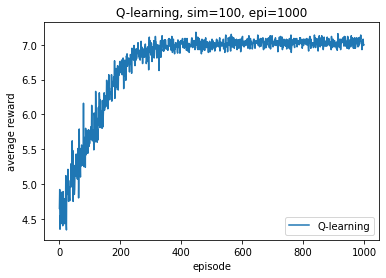

In [89]:
def main():
    sim = 100
    epi = 1000
    s = Simulator(sim, epi, 'q')
    s.run()

main()